<a href="https://colab.research.google.com/github/veeransr/ML-and-Deep-learning-practice-with-python/blob/master/Torch_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparation
The following are the libraries we are going to use for this lab. The torch.manual_seed() is for forcing the random function to give the same number every time we try to recompile it.

In [2]:


import torch 
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [0]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1].item()))

In [0]:
# Run the command below when you do not have torchvision installed
# !conda install -y torchvision

import torchvision.transforms as transforms
import torchvision.datasets as dsets

We can import a prebuilt dataset. In this case, use MNIST. You'll work with several of these parameters later by placing a transform object in the argument transform.

In [5]:
dataset = dsets.MNIST(
    root = './data', 
    train = False, 
    download = True, 
    transform = transforms.ToTensor()
)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [6]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?

print("Type of the first element: ", type(dataset[0]))
print("The length of the tuple: ", len(dataset[0]))
print("The shape of the first element in the tuple: ", dataset[0][0].shape)
print("The type of the first element in the tuple", type(dataset[0][0]))
print("The second element in the tuple: ", dataset[0][1])
print("The type of the second element in the tuple: ", type(dataset[0][1]))
print("As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).")

Type of the first element:  <class 'tuple'>
The length of the tuple:  2
The shape of the first element in the tuple:  torch.Size([1, 28, 28])
The type of the first element in the tuple <class 'torch.Tensor'>
The second element in the tuple:  7
The type of the second element in the tuple:  <class 'int'>
As the result, the structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(7)).


As shown in the output, the first element in the tuple is a cuboid tensor. As you can see, there is a dimension with only size 1, so basically, it is a rectangular tensor.
The second element in the tuple is a number tensor, which indicate the real number the image shows. As the second element in the tuple is tensor(7), the image should show a hand-written 7.

In [10]:
len(dataset)

10000

AttributeError: ignored

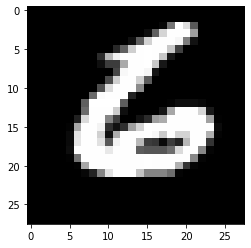

In [11]:
show_data(dataset[9999])

In [12]:
dataset[9999][1]

6

We can apply some image transform functions on the MNIST dataset.

As an example, the images in the MNIST dataset can be cropped and converted to a tensor. We can use transform.Compose we learned from the previous lab to combine the two transform functions.

We can see the image is now 20 x 20 instead of 28 x 28.

In [13]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = croptensor_data_transform)
print("The shape of the first element in the first tuple: ", dataset[0][0].shape)

The shape of the first element in the first tuple:  torch.Size([1, 20, 20])


AttributeError: ignored

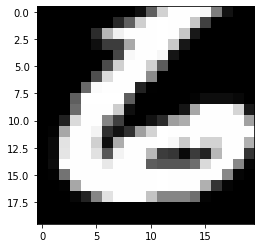

In [15]:
# Plot the first element in the dataset

show_data(dataset[9999],shape = (20, 20))

AttributeError: ignored

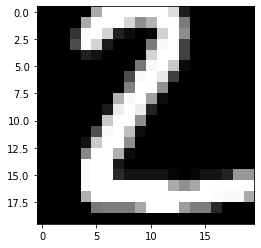

In [16]:
# Plot the second element in the dataset

show_data(dataset[1],shape = (20, 20))

In the below example, we horizontally flip the image, and then convert it to a tensor. Use transforms.Compose() to combine these two transform functions. Plot the flipped image.

AttributeError: ignored

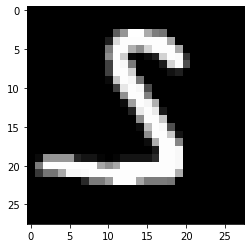

In [17]:
fliptensor_data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = fliptensor_data_transform)
show_data(dataset[1])

Practice¶
Try to use the RandomVerticalFlip (vertically flip the image) with horizontally flip and convert to tensor as a compose. Apply the compose on image. Use show_data() to plot the second image (the image as 2).

AttributeError: ignored

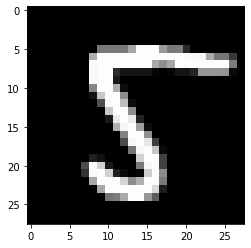

In [18]:
fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p = 1),transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = fliptensor_data_transform)
show_data(dataset[1])

# These are the libraries will be used for this lab.

import numpy as np
import matplotlib.pyplot as plt

In [0]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [0]:
# Import the library PyTorch

import torch

In [0]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

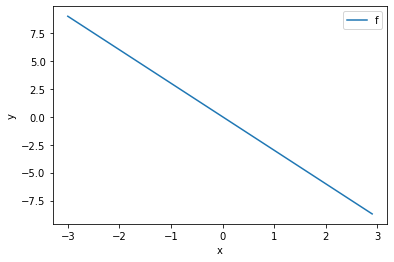

In [12]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Let us add some noise to the data in order to simulate the real data. Use torch.randn(X.size()) to generate Gaussian noise that is the same size as X and has a standard deviation opf 0.1.

In [0]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

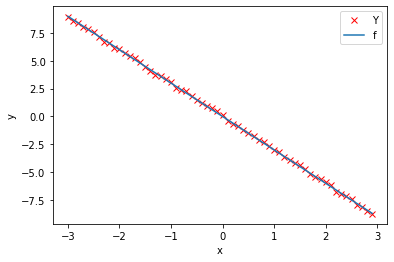

In [24]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Create the Model and Cost Function (Total Loss)
In this section, let us create the model and the cost function (total loss) we are going to use to train the model and evaluate the result.

First, define the forward function  𝑦=𝑤∗𝑥 . (We will add the bias in the next lab.)

In [0]:
# Create forward function for prediction

def forward(x):
    return w * x

In [0]:
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [0]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

In [0]:
w = torch.tensor(-10.0, requires_grad = True)

In [0]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

In [0]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

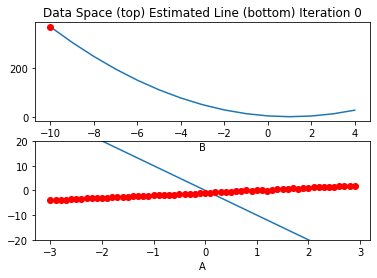

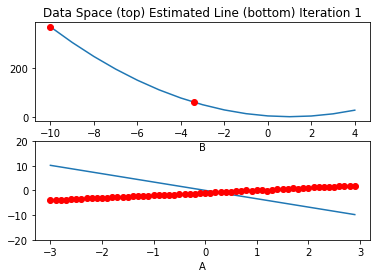

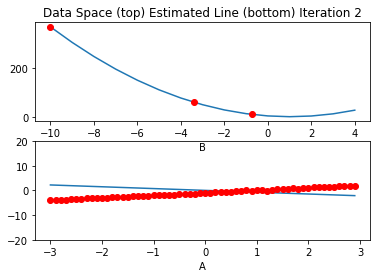

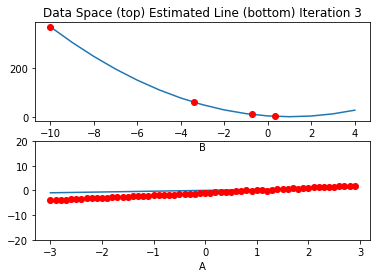

<Figure size 432x288 with 0 Axes>

In [19]:
# Give 4 iterations for training the model here.

train_model(4)

Text(24.0, 0.5, 'Cost')

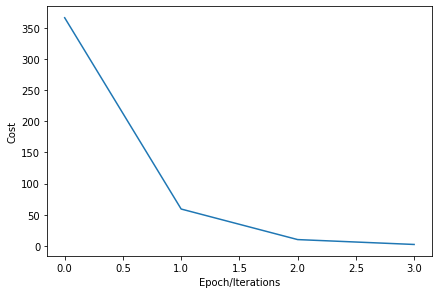

In [20]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

Practice
Create a new learnable parameter w with an initial value of -15.0.

Create an empty list LOSS2:

Write your own my_train_model function with loss list LOSS2. And run it with 4 iterations.

gradient_plot1 = plot_diagram(X, Y, w, stop = 15)

Plot an overlay of the list LOSS2 and LOSS.

What does this tell you about the parameter value?


In [0]:
w = torch.tensor(-15.0, requires_grad = True)

In [0]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

In [0]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS2 = []

In [0]:
def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS2.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

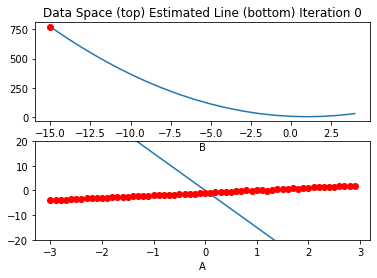

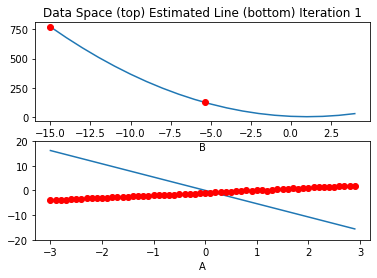

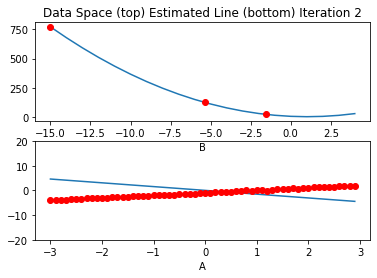

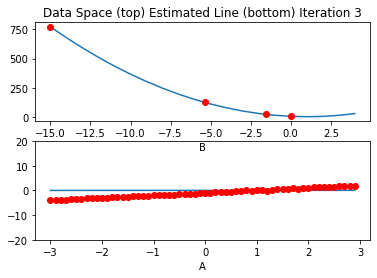

<Figure size 432x288 with 0 Axes>

In [25]:
train_model(4)

In [0]:
gradient_plot1 = plot_diagram(X, Y, w, stop = 15)

Text(24.125, 0.5, 'Cost')

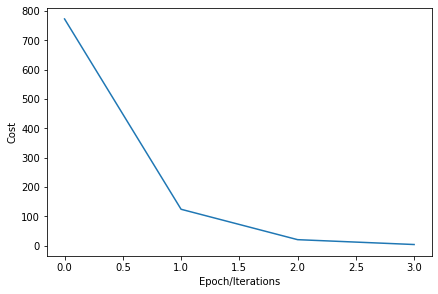

In [27]:
# Plot the loss for each iteration

plt.plot(LOSS2)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

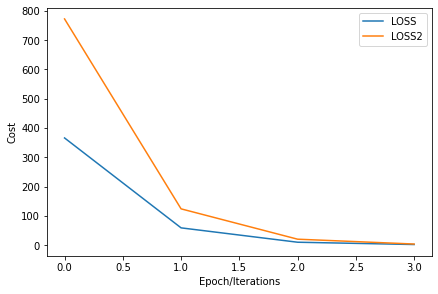

In [30]:
# Plot the loss for each iteration

plt.plot(LOSS, label = 'LOSS')
plt.plot(LOSS2, label ="LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()

Linear regression 1D: Training Two Parameter

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Linear regression 1D: Training Two Parameter

In [0]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

Understanding mesg grid

In [46]:
w_range = 15
b_range = 15
n_samples = 30
W = np.linspace(-w_range, w_range, n_samples)
B = np.linspace(-b_range, b_range, n_samples)
w, b = np.meshgrid(W, B)   
print (w [:1],b[1:3])

[[-15.         -13.96551724 -12.93103448 -11.89655172 -10.86206897
   -9.82758621  -8.79310345  -7.75862069  -6.72413793  -5.68965517
   -4.65517241  -3.62068966  -2.5862069   -1.55172414  -0.51724138
    0.51724138   1.55172414   2.5862069    3.62068966   4.65517241
    5.68965517   6.72413793   7.75862069   8.79310345   9.82758621
   10.86206897  11.89655172  12.93103448  13.96551724  15.        ]] [[-13.96551724 -13.96551724 -13.96551724 -13.96551724 -13.96551724
  -13.96551724 -13.96551724 -13.96551724 -13.96551724 -13.96551724
  -13.96551724 -13.96551724 -13.96551724 -13.96551724 -13.96551724
  -13.96551724 -13.96551724 -13.96551724 -13.96551724 -13.96551724
  -13.96551724 -13.96551724 -13.96551724 -13.96551724 -13.96551724
  -13.96551724 -13.96551724 -13.96551724 -13.96551724 -13.96551724]
 [-12.93103448 -12.93103448 -12.93103448 -12.93103448 -12.93103448
  -12.93103448 -12.93103448 -12.93103448 -12.93103448 -12.93103448
  -12.93103448 -12.93103448 -12.93103448 -12.93103448 -12.9

In [0]:
# Import PyTorch library

import torch

Start with generating values from -3 to 3 that create a line with a slope of 1 and a bias of -1. This is the line that you need to estimate.

In [48]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
f[:5]

tensor([[-4.0000],
        [-3.9000],
        [-3.8000],
        [-3.7000],
        [-3.6000]])

In [49]:
# Add noise

Y = f + 2 * torch.randn(X.size())
Y[:5]

tensor([[-6.6568],
        [-2.5981],
        [-4.9354],
        [-6.8936],
        [-6.6353]])

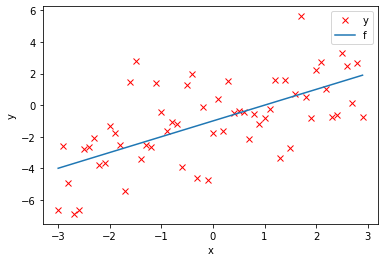

In [50]:
# Plot out the line and the points with noise

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Create the Model and Cost Function (Total Loss)

Define the forward function:

In [0]:
# Define the forward function

def forward(x):
    return w * x + b

In [0]:
# Define the MSE Loss function

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

<Figure size 432x288 with 0 Axes>

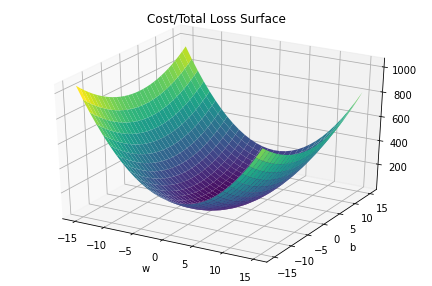

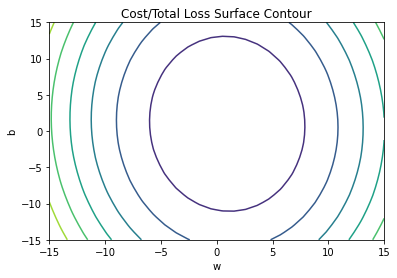

In [53]:
#Create a  plot_error_surfaces object to visualize the data space and the parameter space during training
get_surface = plot_error_surfaces(15, 15, X, Y, 30)

Train the Model
Create model parameters w, b by setting the argument requires_grad to True because we must learn it using the data.

In [0]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [0]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS = []

In [0]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # store the loss in the list LOSS
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

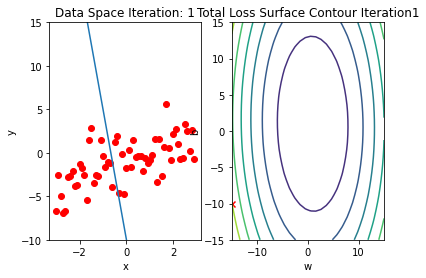

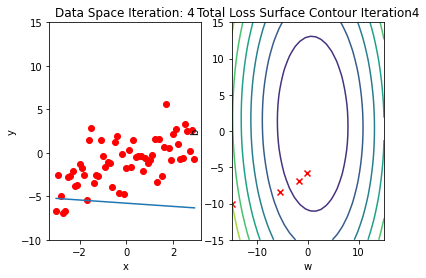

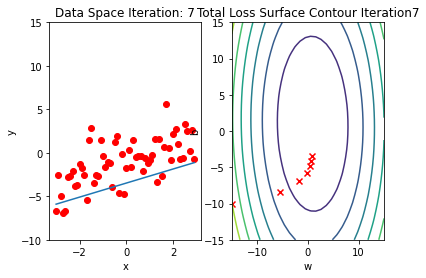

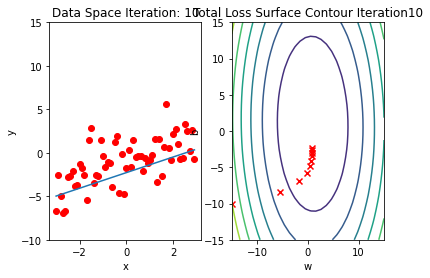

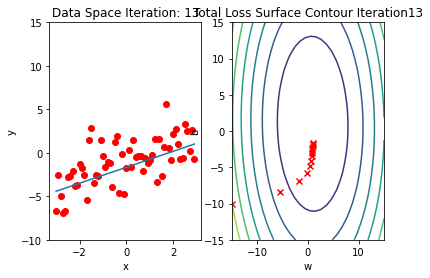

In [57]:
# Train the model with 15 iterations

train_model(15)

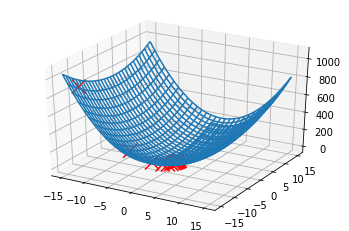

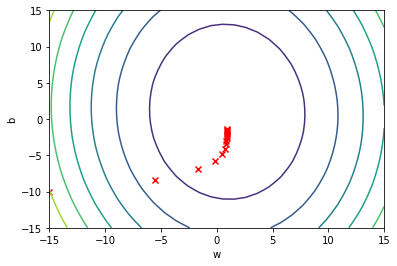

Text(24.125, 0.5, 'Cost')

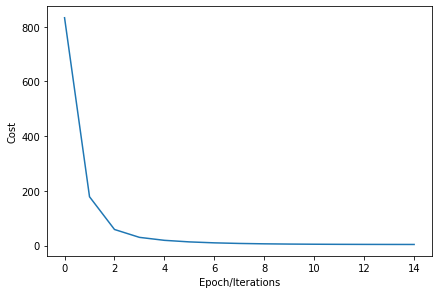

In [58]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [0]:
#Experiment using s learning rates 0.2 and width the following parameters. Run 15 iterations.
# Practice: train and plot the result with lr = 0.2 and the following parameters

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.2
LOSS2 = []

In [0]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # store the loss in the list LOSS
        LOSS2.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

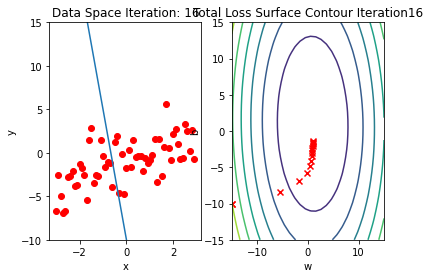

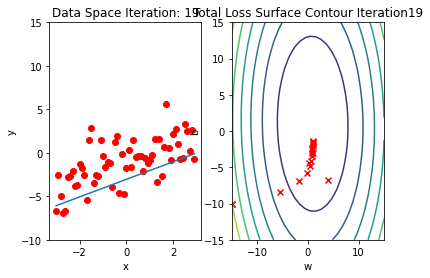

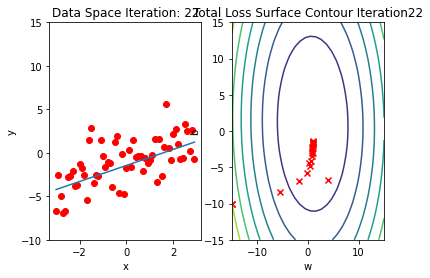

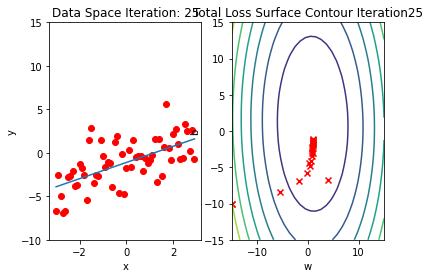

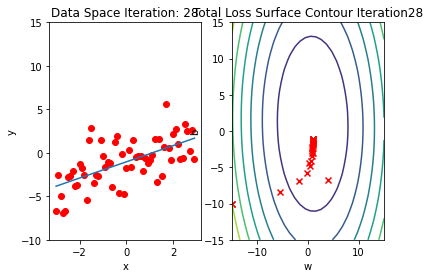

In [62]:
train_model(15)

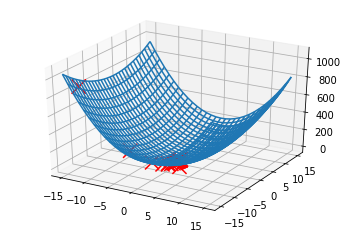

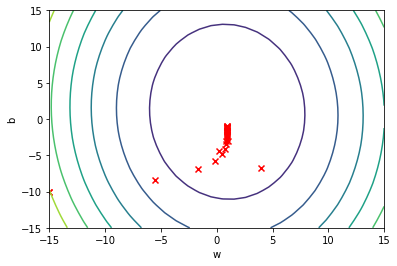

Text(24.125, 0.5, 'Cost')

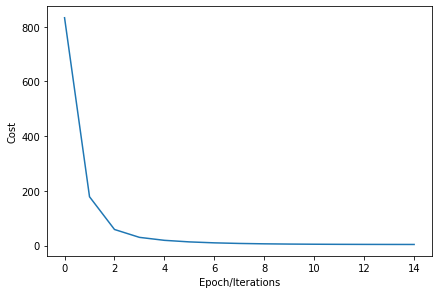

In [63]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

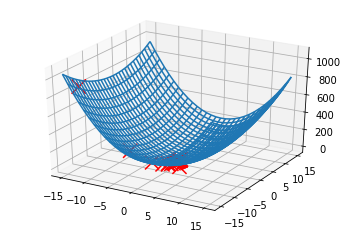

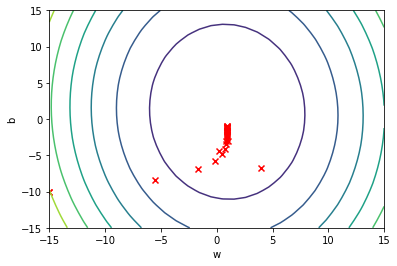

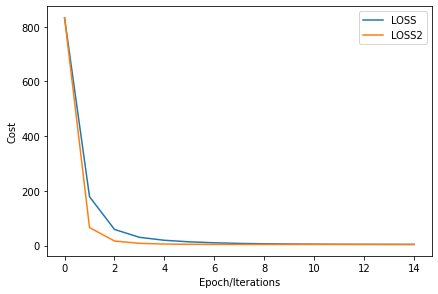

In [65]:
# Practice: Plot the LOSS and LOSS2 in order to compare the Total Loss
get_surface.final_plot()
plt.plot(LOSS, label= 'LOSS')
plt.plot(LOSS2,   label = 'LOSS2')
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()

# Linear regression 1D: Training Two Parameter Stochastic Gradient Descent (SGD)

In [0]:
 #These are the libraries we are going to use in the lab.

import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

In [0]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [69]:
# Set random seed

torch.manual_seed(1)

In [0]:
# Setup the actual data and simulated data

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

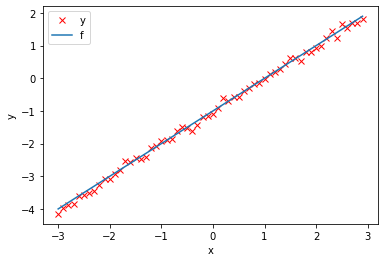

In [71]:
# Plot out the data dots and line

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [0]:
# Define the forward function

def forward(x):
    return w * x + b

In [0]:
# Define the MSE Loss function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

<Figure size 432x288 with 0 Axes>

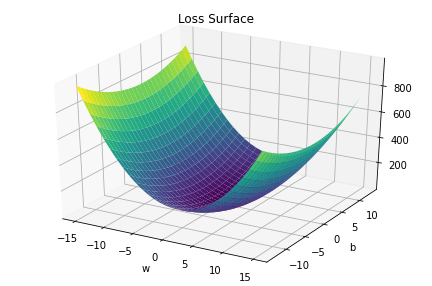

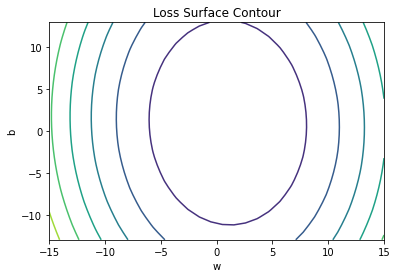

In [74]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30)

# Train the Model: Batch Gradient Descent for comparison

In [0]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

In [0]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS_BGD = []

In [0]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
            
        # store the loss in the list LOSS_BGD
        LOSS_BGD.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

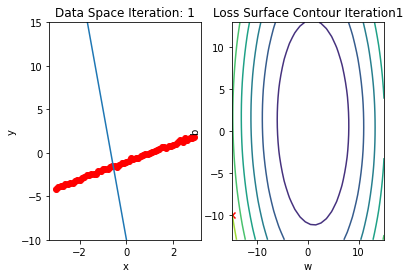

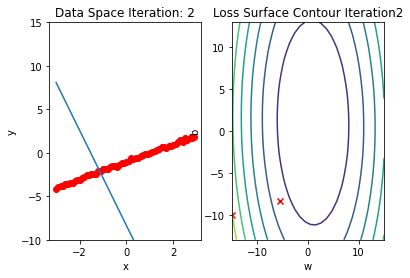

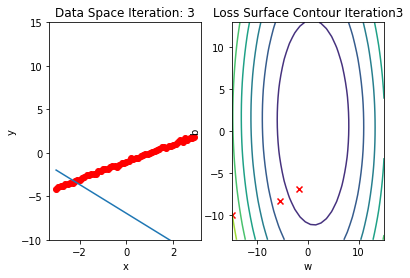

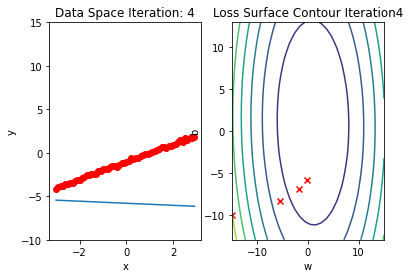

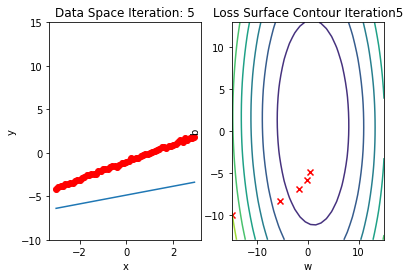

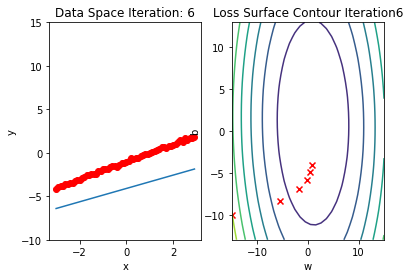

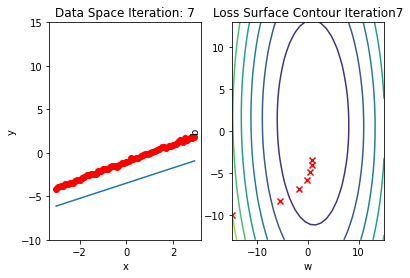

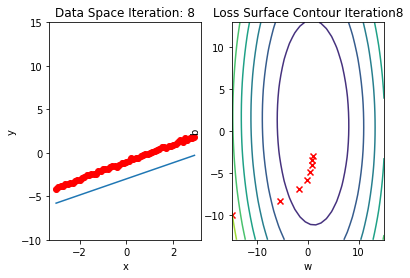

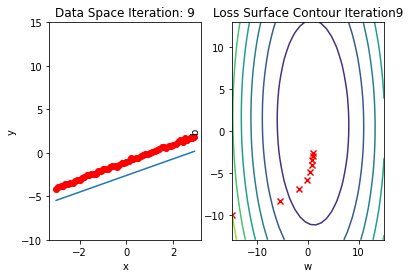

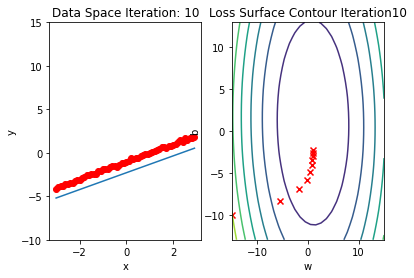

In [78]:
# Train the model with 10 iterations

train_model(10)

# Train the Model: Stochastic Gradient Descent

In [0]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [0]:
# Define train_model_SGD function for training the model.

# The function for training the model

LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def train_model_SGD(iter):
    
    # Loop
    for epoch in range(iter):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)

        # store the loss 
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        
        for x, y in zip(X, Y):
            
            # make a pridiction
            yhat = forward(x)
        
            # calculate the loss 
            loss = criterion(yhat, y)

            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        
            # backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
        
            # update parameters slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

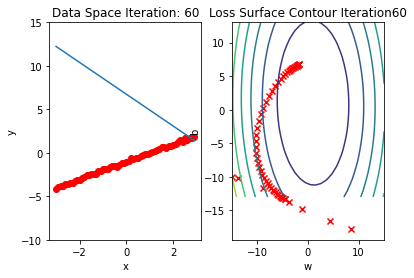

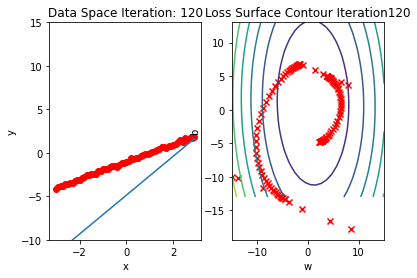

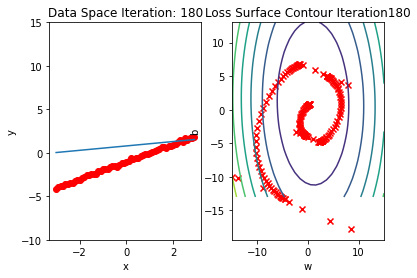

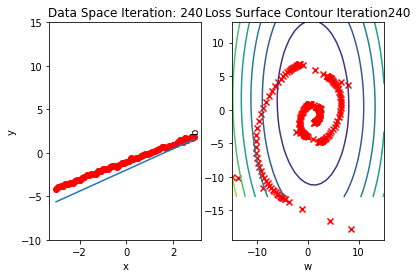

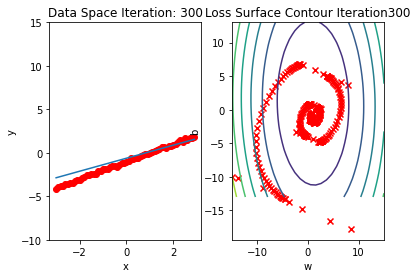

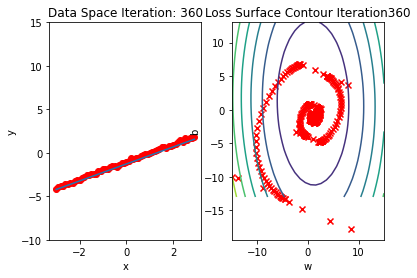

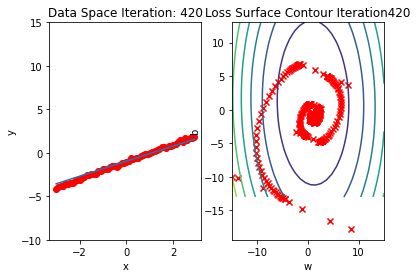

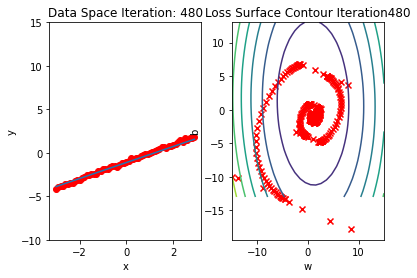

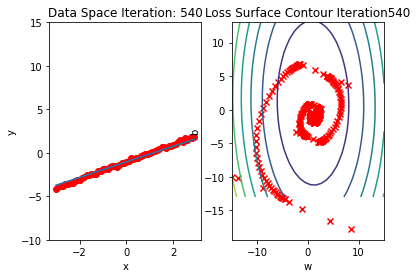

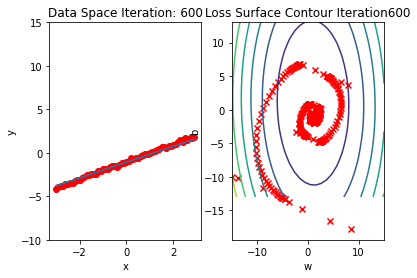

In [82]:
# Train the model with 10 iterations

train_model_SGD(10)

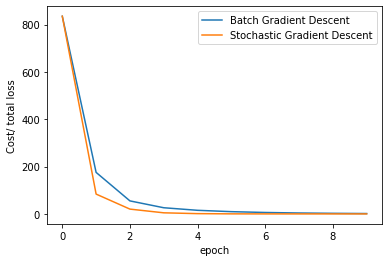

In [83]:
# Plot out the LOSS_BGD and LOSS_SGD

plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

# SGD with Dataset DataLoader

In [0]:
# Import the library for DataLoader

from torch.utils.data import Dataset, DataLoader

In [0]:
# Dataset Class

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * self.x - 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index], self.y[index]
    
    # Return the length
    def __len__(self):
        return self.len

In [86]:
# Create the dataset and check the length

dataset = Data()
print("The length of dataset: ", len(dataset))

The length of dataset:  60


In [87]:
# Print the first point

x, y = dataset[0]
print("(", x, ", ", y, ")")

( tensor([-3.]) ,  tensor([-4.]) )


In [88]:
# Print the first 3 point

x, y = dataset[0:3]
print("The first 3 x: ", x)
print("The first 3 y: ", y)

The first 3 x:  tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
The first 3 y:  tensor([[-4.0000],
        [-3.9000],
        [-3.8000]])


In [0]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [0]:
# Create DataLoader

trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [0]:
# The function for training the model

w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_Loader = []

def train_model_DataLoader(epochs):
    
    # Loop
    for epoch in range(epochs):
        
        # SGD is an approximation of out true total loss/cost, in this line of code we calculate our true loss/cost and store it
        Yhat = forward(X)
        
        # store the loss 
        LOSS_Loader.append(criterion(Yhat, Y).tolist())
        
        for x, y in trainloader:
            
            # make a prediction
            yhat = forward(x)
            
            # calculate the loss
            loss = criterion(yhat, y)
            
            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            
            # Backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
            
            # Updata parameters slope
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr* b.grad.data
            
            # Clear gradients 
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

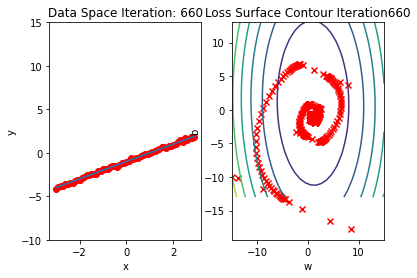

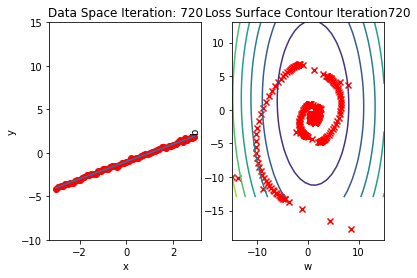

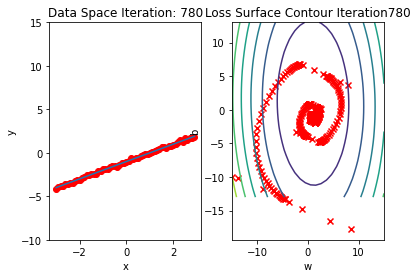

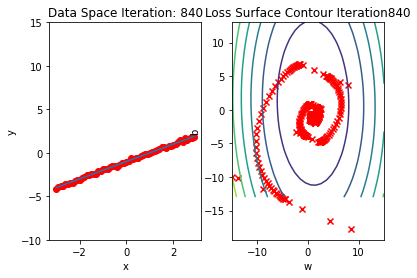

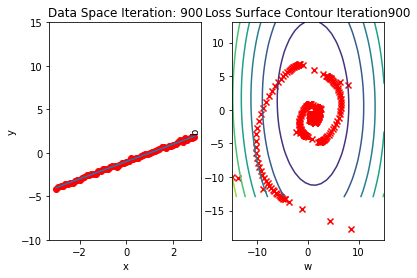

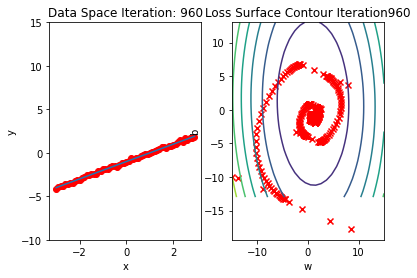

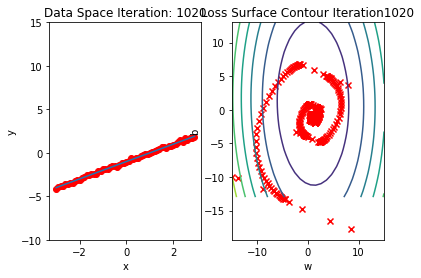

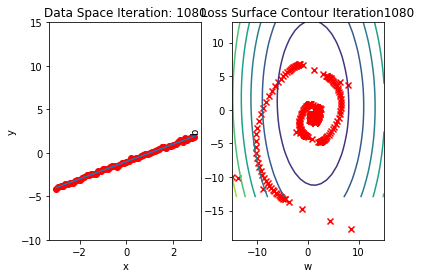

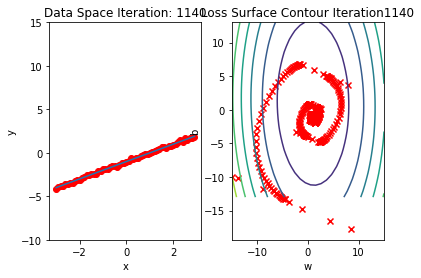

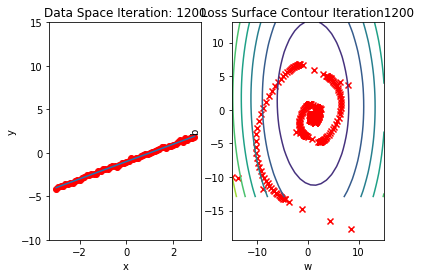

In [99]:
# Run 10 iterations

train_model_DataLoader(10)

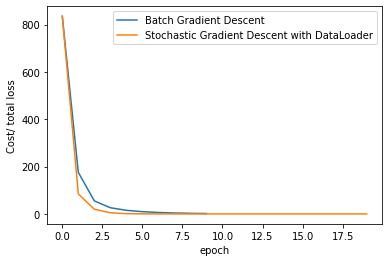

In [100]:
# Plot the LOSS_BGD and LOSS_Loader

plt.plot(LOSS_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

In [0]:
# Practice: Use SGD with trainloader to train model and store the total loss in LOSS

LOSS = []
w = torch.tensor(-12.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

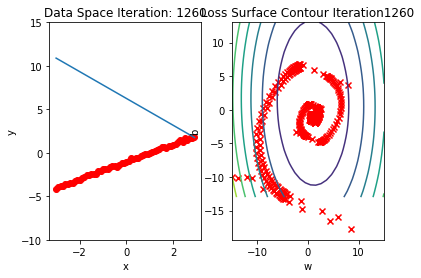

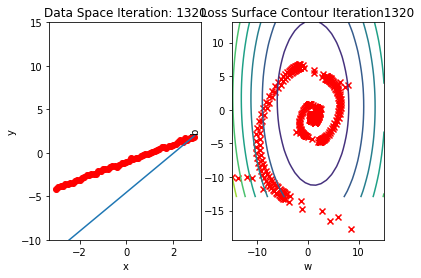

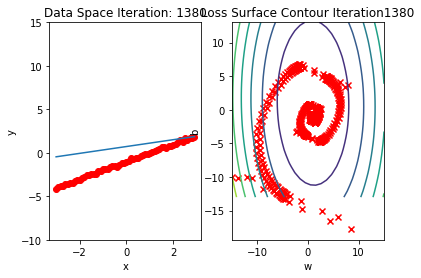

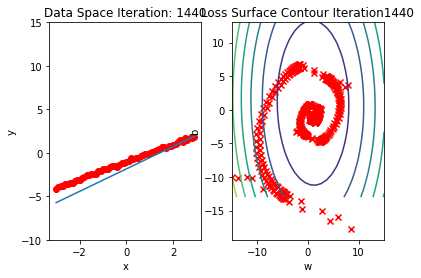

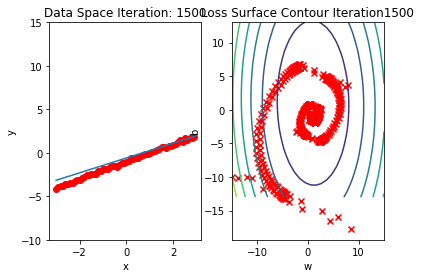

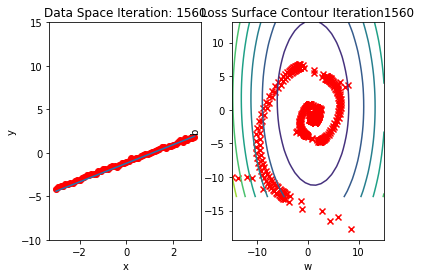

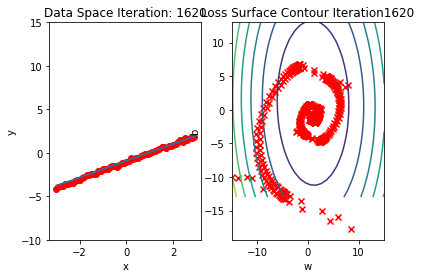

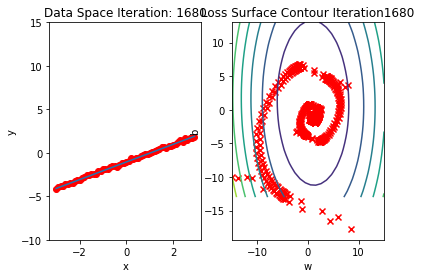

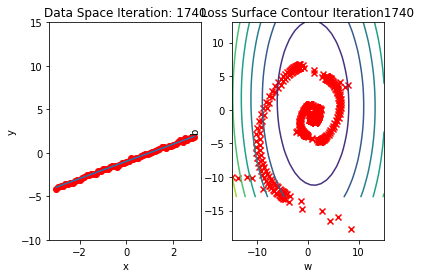

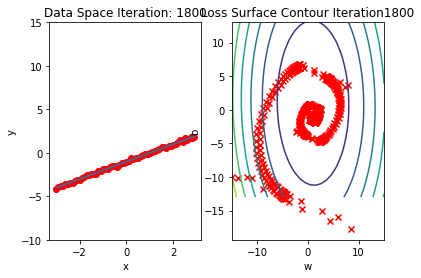

In [102]:
def my_train_model(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        LOSS.append(criterion(Yhat, X))
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()
my_train_model(10)

In [104]:
LOSS

[tensor(594.2816, grad_fn=<MeanBackward0>),
 tensor(59.2016, grad_fn=<MeanBackward0>),
 tensor(25.5874, grad_fn=<MeanBackward0>),
 tensor(1.6117, grad_fn=<MeanBackward0>),
 tensor(3.7008, grad_fn=<MeanBackward0>),
 tensor(0.3962, grad_fn=<MeanBackward0>),
 tensor(1.4643, grad_fn=<MeanBackward0>),
 tensor(0.8139, grad_fn=<MeanBackward0>),
 tensor(1.1004, grad_fn=<MeanBackward0>),
 tensor(0.9533, grad_fn=<MeanBackward0>)]

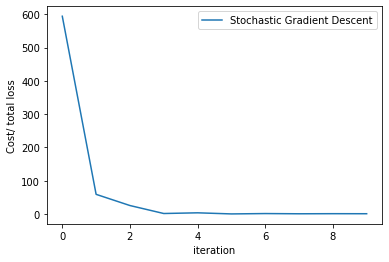

In [103]:
plt.plot(LOSS,label = "Stochastic Gradient Descent")
plt.xlabel('iteration')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

# Linear Regression 1D: Training Two Parameter Mini-Batch Gradient Decent¶

In [0]:
# Import the libraries we need for this lab

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [0]:
# The class for plotting the diagrams

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Data Space Iteration: '+ str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [20]:
# Import PyTorch library

import torch
torch.manual_seed(1)

In [0]:
# Generate the data with noise and the line

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())

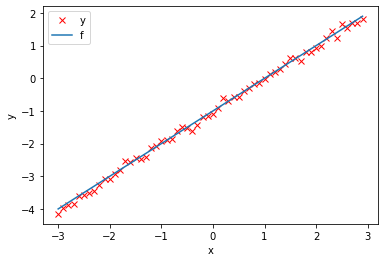

In [22]:
# Plot the line and the data

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [0]:
# Define the prediction function

def forward(x):
    return w * x + b

In [0]:
# Define the cost function

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

<Figure size 432x288 with 0 Axes>

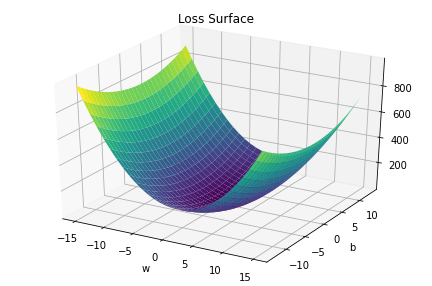

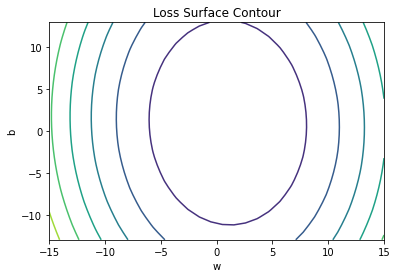

In [27]:
# Create a plot_error_surfaces object.

get_surface = plot_error_surfaces(15, 13, X, Y, 30)

In [0]:
# Define the function for training model

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.1
LOSS_BGD = []

def train_model_BGD(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        LOSS_BGD.append(loss)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()

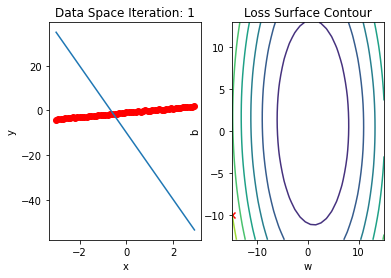

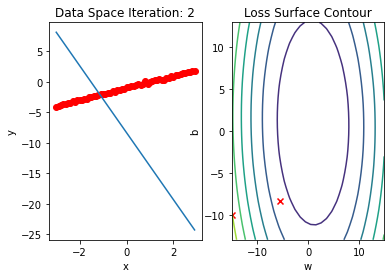

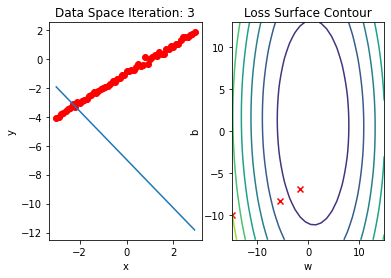

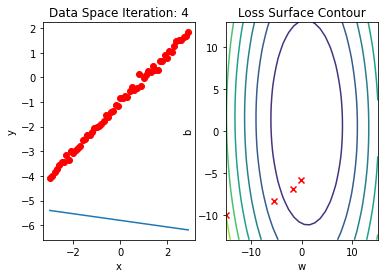

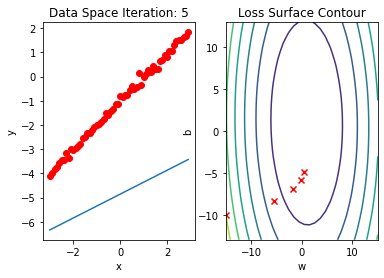

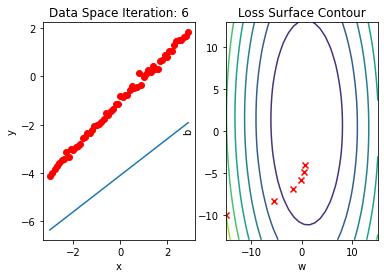

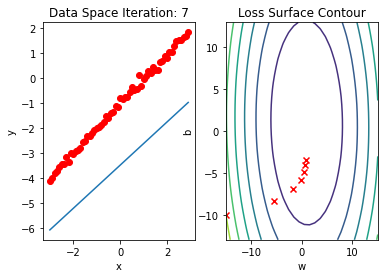

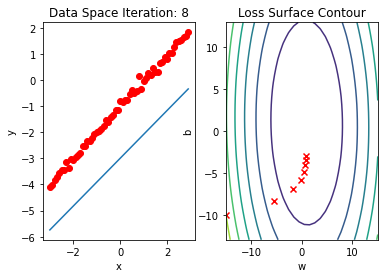

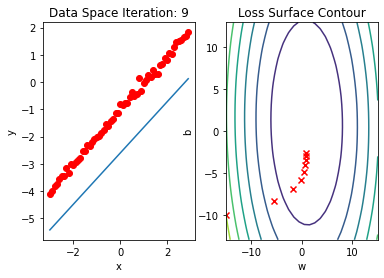

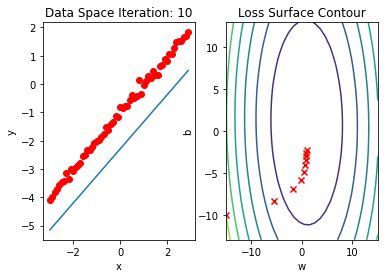

In [114]:
# Run train_model_BGD with 10 iterations

train_model_BGD(10)

# Stochastic Gradient Descent (SGD) with Dataset DataLoader

In [0]:
# Create a plot_error_surfaces object.

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [0]:
# Import libraries

from torch.utils.data import Dataset, DataLoader

In [0]:
# Create class Data

class Data(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = 1 * X - 1
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [0]:
# Create Data object and DataLoader object

dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 1)

In [0]:
# Define train_model_SGD function

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_SGD = []
lr = 0.1
def train_model_SGD(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_SGD.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()

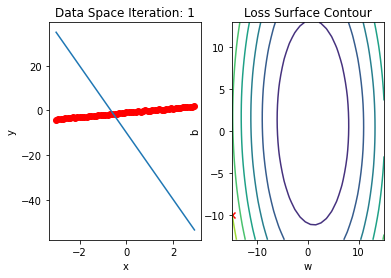

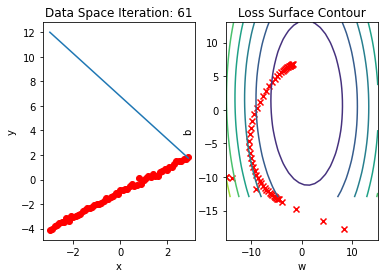

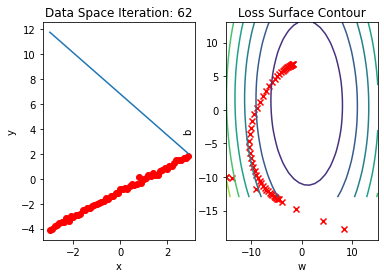

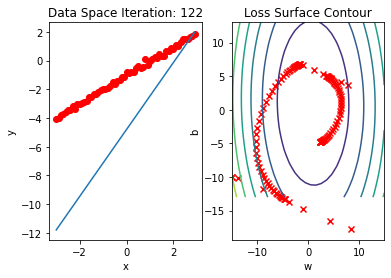

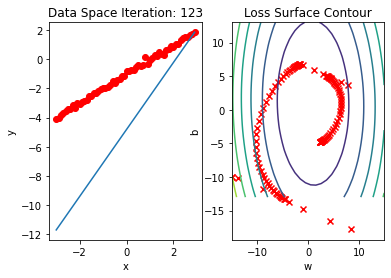

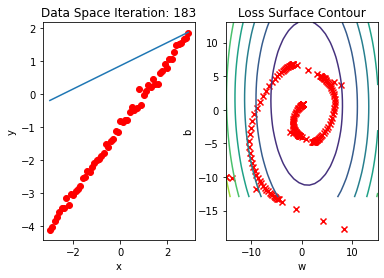

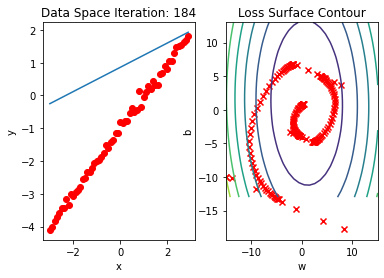

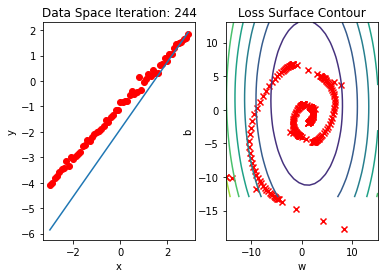

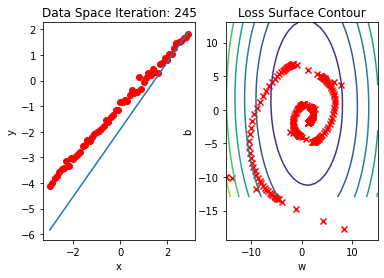

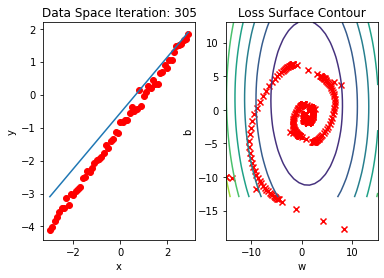

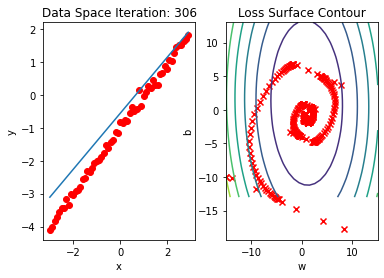

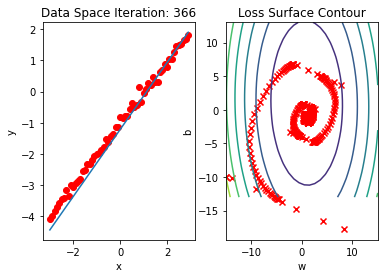

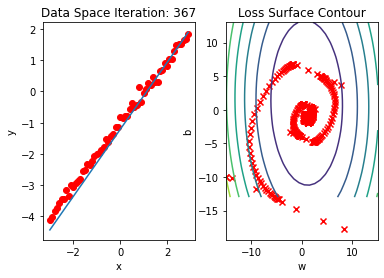

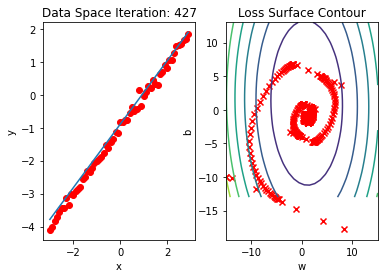

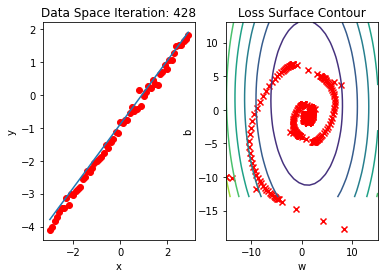

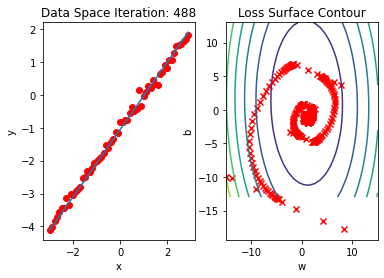

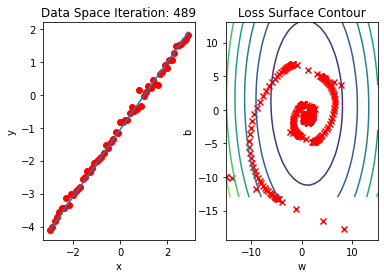

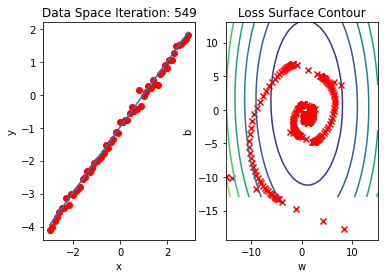

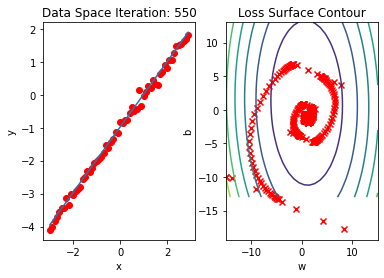

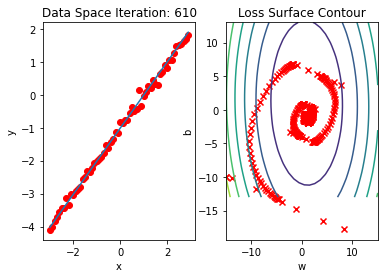

In [121]:
# Run train_model_SGD(iter) with 10 iterations

train_model_SGD(10)

# Mini Batch Gradient Descent: Batch Size Equals 5

In [0]:
# Create a plot_error_surfaces object.

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [0]:
# Create DataLoader object and Data object

dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 5)

In [0]:
# Define train_model_Mini5 function

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI5 = []
lr = 0.1

def train_model_Mini5(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI5.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

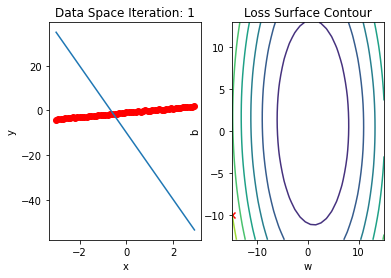

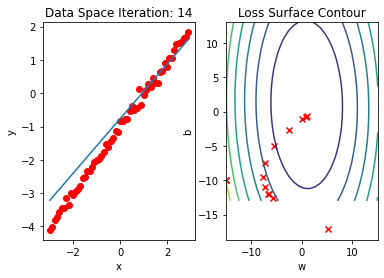

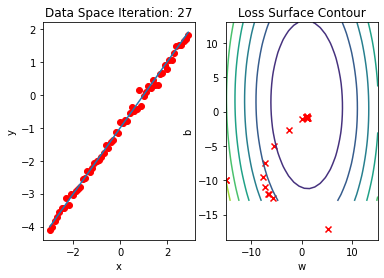

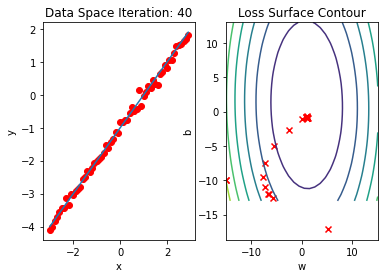

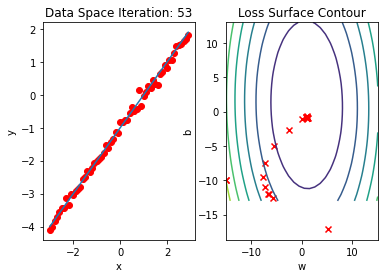

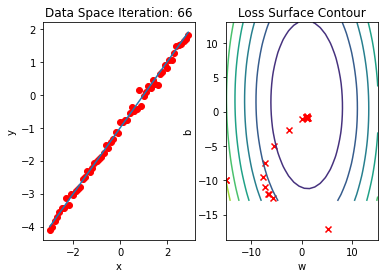

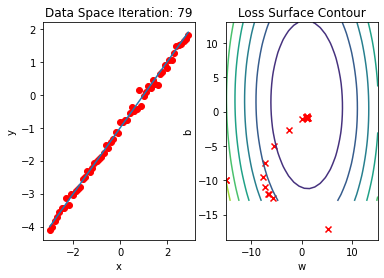

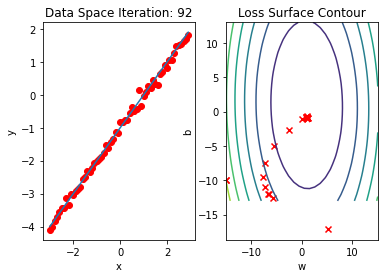

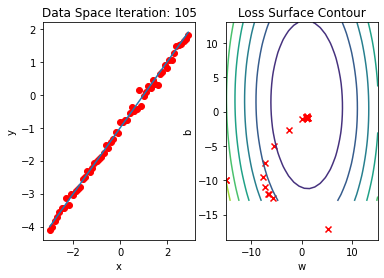

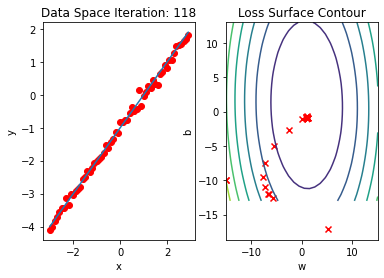

In [125]:
# Run train_model_Mini5 with 10 iterations.

train_model_Mini5(10)

In [0]:
# Create a plot_error_surfaces object.

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [12]:
# Create DataLoader object

dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10)

NameError: ignored

In [0]:
# Define train_model_Mini5 function

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI10 = []
lr = 0.1

def train_model_Mini10(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI10.append(criterion(forward(X),Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

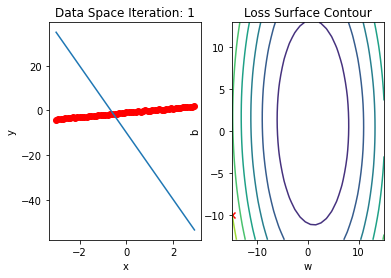

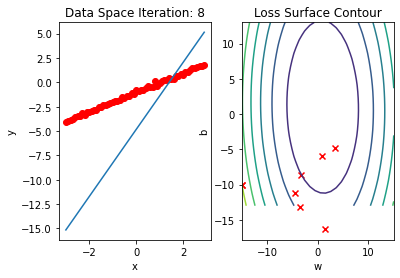

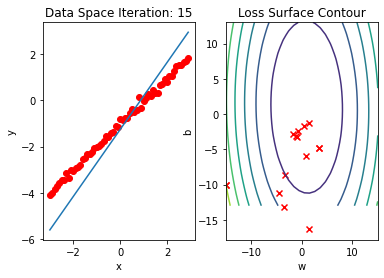

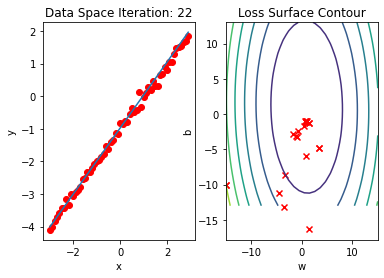

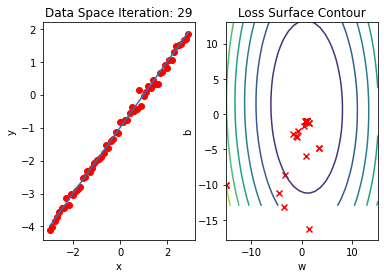

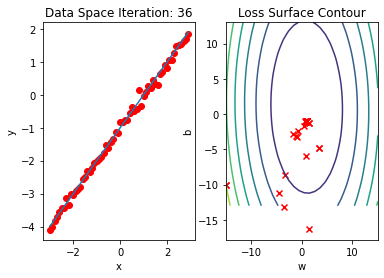

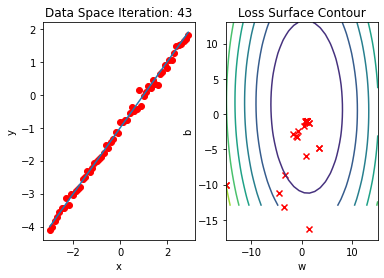

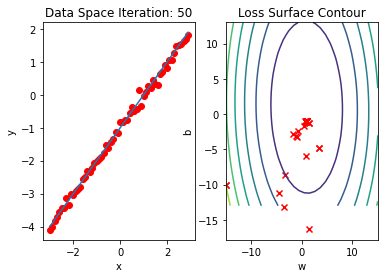

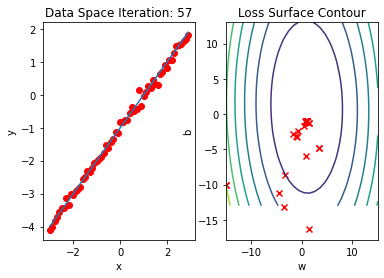

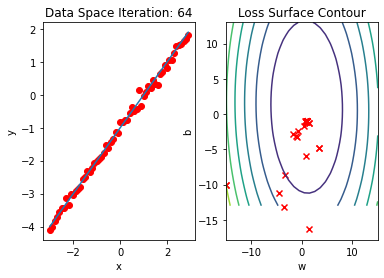

In [129]:
# Run train_model_Mini5 with 10 iterations.

train_model_Mini10(10)

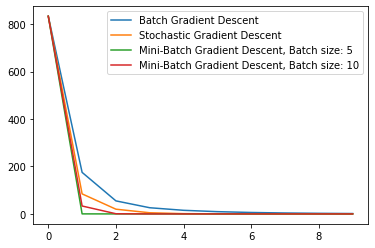

In [130]:
# Plot out the LOSS for each method

plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI5,label = "Mini-Batch Gradient Descent, Batch size: 5")
plt.plot(LOSS_MINI10,label = "Mini-Batch Gradient Descent, Batch size: 10")
plt.legend()

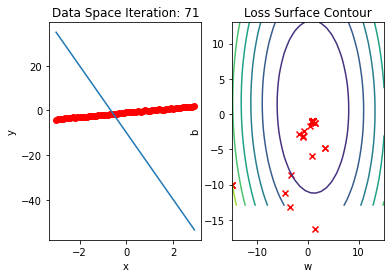

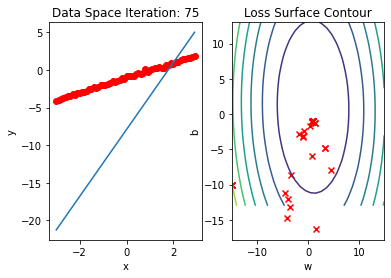

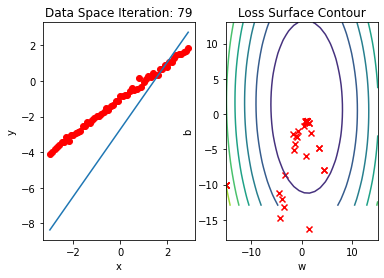

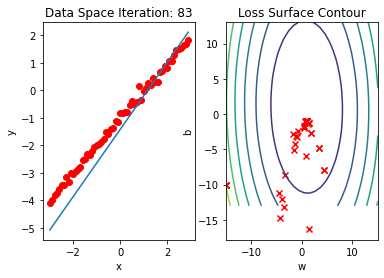

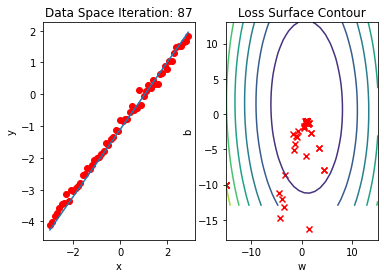

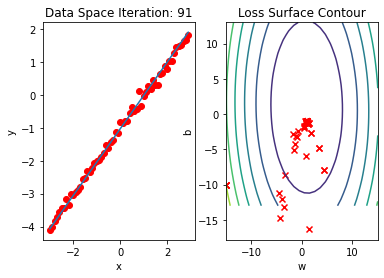

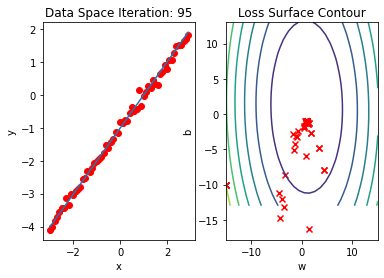

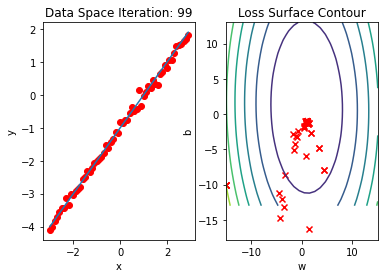

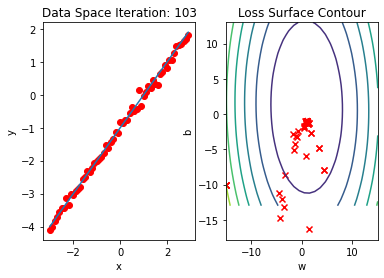

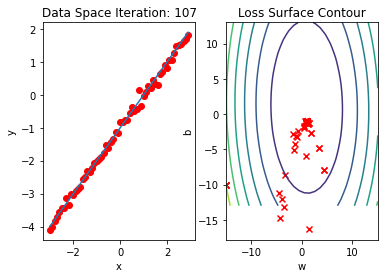

In [131]:
trainloader = DataLoader(dataset = dataset, batch_size = 20)
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

LOSS_MINI20 = []
lr = 0.1

def my_train_model(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI20.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

my_train_model(10)

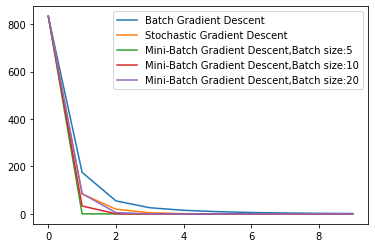

In [132]:
plt.plot(LOSS_BGD, label = "Batch Gradient Descent")
plt.plot(LOSS_SGD, label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI5, label = "Mini-Batch Gradient Descent,Batch size:5")
plt.plot(LOSS_MINI10, label = "Mini-Batch Gradient Descent,Batch size:10")
plt.plot(LOSS_MINI20, label = "Mini-Batch Gradient Descent,Batch size:20")
plt.legend()

# Linear Regression 1D: Training Two Parameter Mini-Batch Gradient Descent

In [0]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
torch.manual_seed(1)
# Build in cost function

criterion = nn.MSELoss()

In [0]:
class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
    # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.LOSS.append(loss)
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram    
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [0]:
# Create a linear regression model class

from torch import nn, optim

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [0]:
# Create optimizer

model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [41]:
list(model.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [42]:
optimizer.state_dict()

{'param_groups': [{'dampening': 0,
   'lr': 0.01,
   'momentum': 0,
   'nesterov': False,
   'params': [140247179101312, 140247179101384],
   'weight_decay': 0}],
 'state': {}}

In [0]:

trainloader = DataLoader(dataset = dataset, batch_size = 1)

PyTorch randomly initialises your model parameters. If we use those parameters, the result will not be very insightful as convergence will be extremely fast. So we will initialise the parameters such that they will take longer to converge, i.e. look cool

In [0]:
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

In [0]:
# Create plot surface object

get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

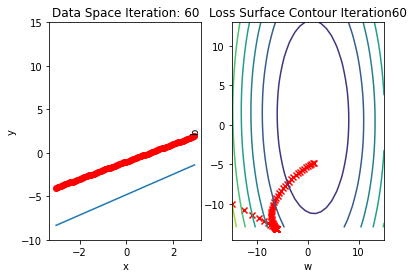

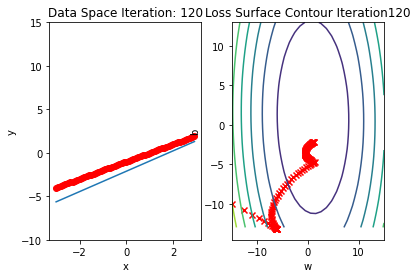

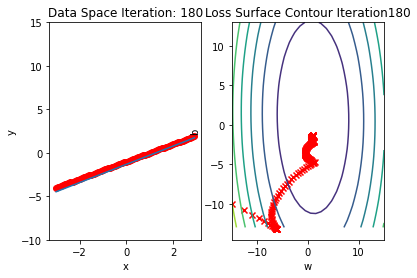

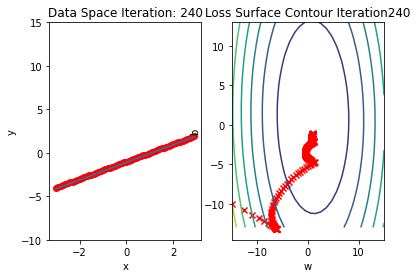

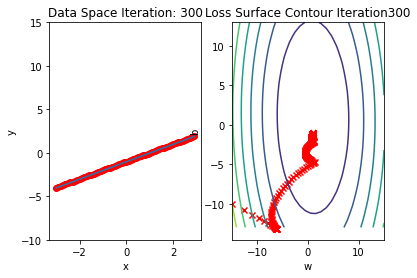

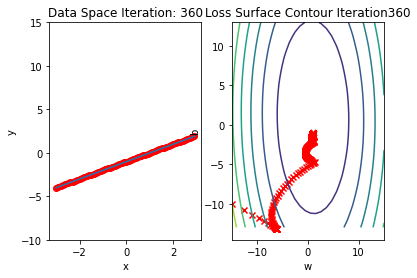

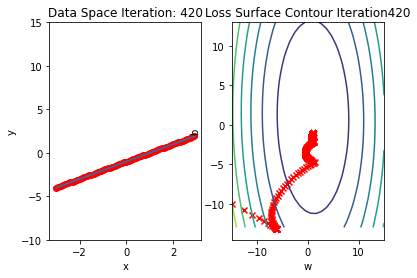

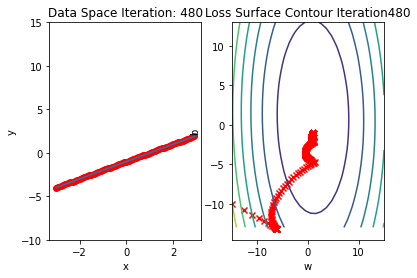

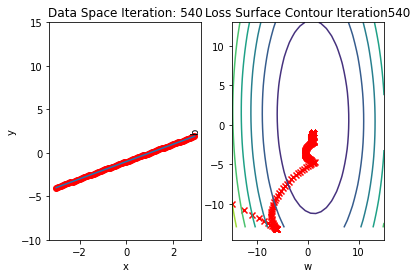

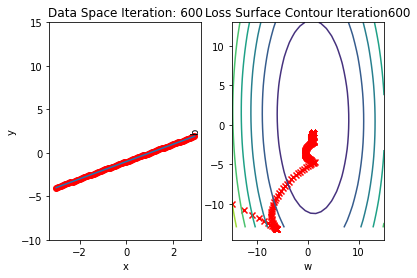

In [46]:
# Train Model

def train_model_BGD(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist())          
            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
        get_surface.plot_ps()


train_model_BGD(10)

In [47]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[1.0000]])),
             ('linear.bias', tensor([-1.0001]))])

In [0]:
# Practice: Train the model via BGD using optimizer

model = linear_regression(1,1)
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10
get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

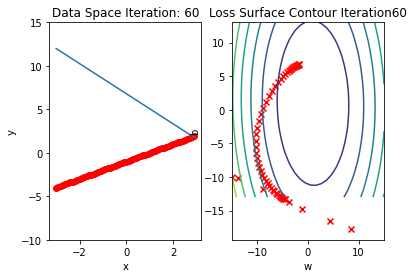

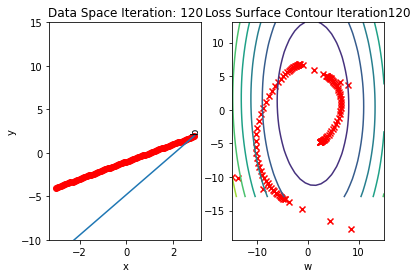

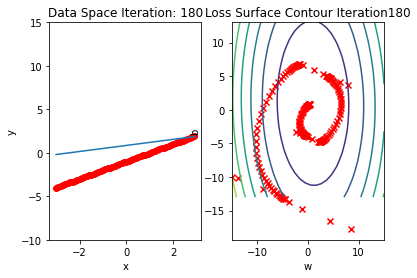

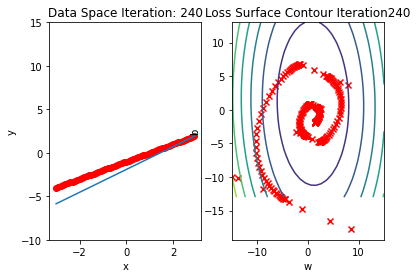

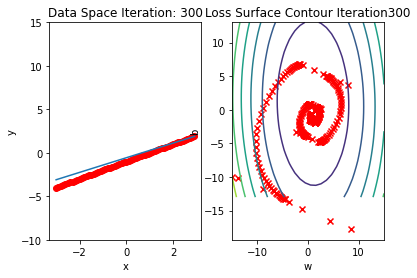

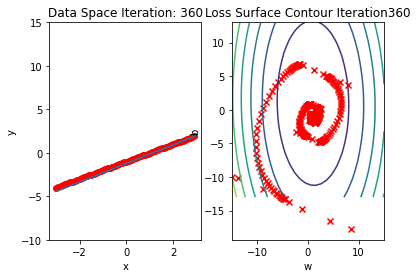

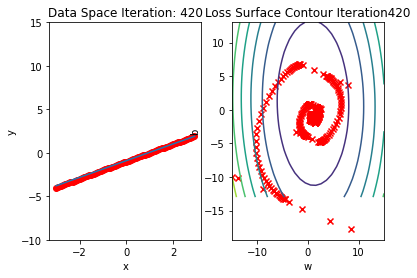

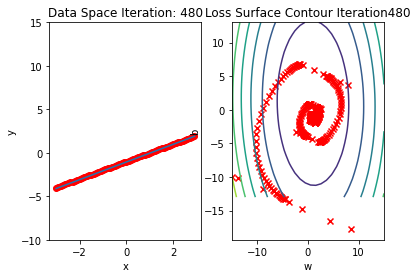

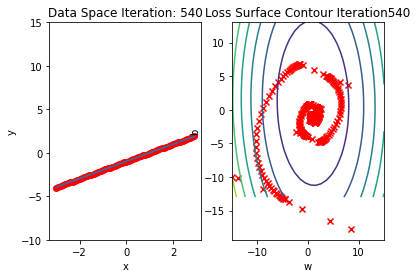

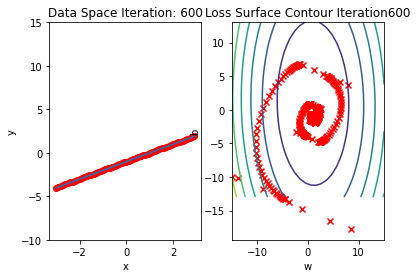

In [49]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)
trainloader = DataLoader(dataset = dataset, batch_size = 1)

def my_train_model(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist()) 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        get_surface.plot_ps()

train_model_BGD(10)

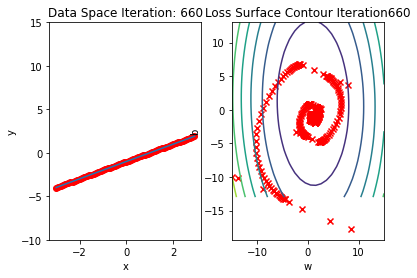

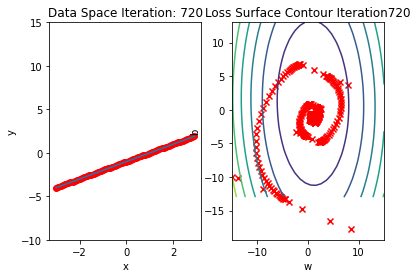

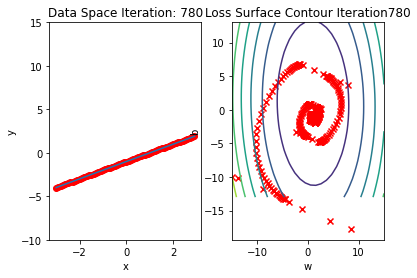

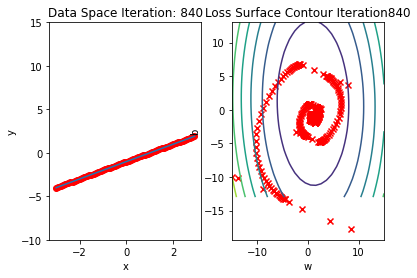

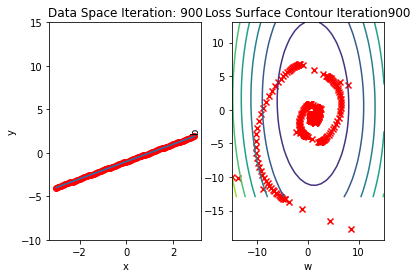

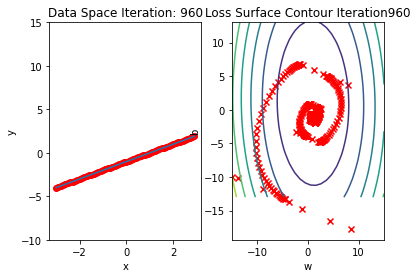

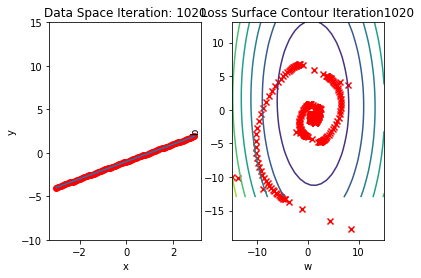

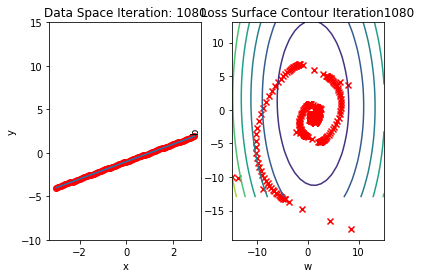

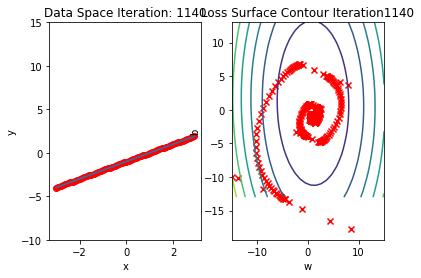

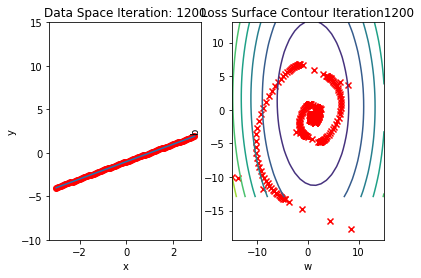

In [50]:
optimizer = optim.Adam(model.parameters(), lr = 0.001)
trainloader = DataLoader(dataset = dataset, batch_size = 1)

def my_train_model(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist()) 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        get_surface.plot_ps()

train_model_BGD(10)

# Linear regression: Training and Validation Data

In [0]:
# Import libraries we need for this lab, and set the random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim

In [0]:
# Create Data class

from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
            #outliers 
            if train == True:
                self.y[0] = 0
                self.y[50:55] = 20
            else:
                pass
      
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [0]:
# Create training dataset and validation dataset

train_data = Data()
val_data = Data(train = False)

In [55]:
train_data[:5]

(tensor([[-3.0000],
         [-2.9000],
         [-2.8000],
         [-2.7000],
         [-2.6000]]), tensor([[0.0000],
         [9.5977],
         [9.3404],
         [8.9994],
         [8.7789]]))

In [56]:
val_data[:5]

(tensor([[-3.0000],
         [-2.9000],
         [-2.8000],
         [-2.7000],
         [-2.6000]]), tensor([[10.0271],
         [ 9.7560],
         [ 9.3682],
         [ 9.2512],
         [ 8.6637]]))

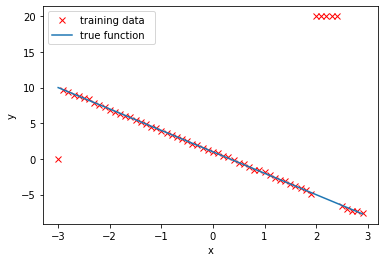

In [58]:
# Plot out training points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [0]:
# Create Linear Regression Class

from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Prediction function
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [0]:
# Create MSELoss function and DataLoader

criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

# Different learning rates and Data Structures to Store results for different Hyperparameters

In [0]:
# Create Learning Rate list, the error lists and the MODELS list

learning_rates=[0.0001, 0.001, 0.01, 0.1]

train_error=torch.zeros(len(learning_rates))
validation_error=torch.zeros(len(learning_rates))

MODELS=[]

# Train different models for different Hyperparameters

In [0]:
# Define the train model function and train the model

def train_model_with_lr (iter, lr_list):
    
    # iterate through different learning rates 
    for i, lr in enumerate(lr_list):
        model = linear_regression(1, 1)
        optimizer = optim.SGD(model.parameters(), lr = lr)
        for epoch in range(iter):
            for x, y in trainloader:
                yhat = model(x)
                loss = criterion(yhat, y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
        # train data
        Yhat = model(train_data.x)
        train_loss = criterion(Yhat, train_data.y)
        train_error[i] = train_loss.item()
    
        # validation data
        Yhat = model(val_data.x)
        val_loss = criterion(Yhat, val_data.y)
        validation_error[i] = val_loss.item()
        MODELS.append(model)

train_model_with_lr(10, learning_rates)

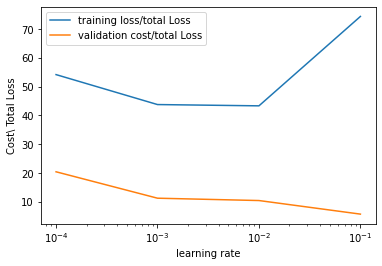

In [64]:
# Plot the training loss and validation loss

plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()


i [[-0.67220944]
 [-0.65930724]
 [-0.64640504]]
i [[5.3545504]
 [5.239936 ]
 [5.1253214]]
i [[6.5914974]
 [6.457079 ]
 [6.3226595]]
i [[14.471453]
 [14.036637]
 [13.601822]]


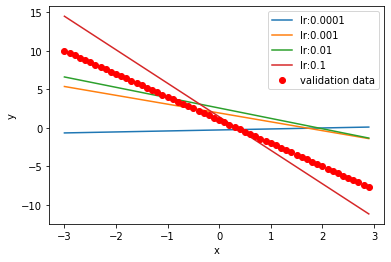

In [65]:
# Plot the predictions

i = 0
for model, learning_rate in zip(MODELS, learning_rates):
    yhat = model(val_data.x)
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label = 'lr:' + str(learning_rate))
    print('i', yhat.detach().numpy()[0:3])
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Practice
The object good_model is the best performing model. Use the train loader to get the data samples x and y. Produce an estimate for yhat and print it out for every sample in a for a loop. Compare it to the actual prediction y.